In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation, FFMpegWriter
%matplotlib inline
from IPython.display import HTML, Image

################### Hier setzt ihr die Anfangsbestimmungen ###############################

L1 = 1 # Länge von Arm 1
L2 = 1 # Länge von Arm 2
m1 = 1 # Masse von Gewicht 1
m2 = 1 # Masse von Gewicht 2
g = 9.81 #Gravitationskonstante

tmax = 10 # Wie lang soll eure Simulation sein?
w1 = 180 # Auslenkung erstes Pendel in Grad
w2 = 45 # Auslenkung zweites Pendel in Grad

In [4]:
# Hier wird bloß was definiert
def deriv(y, t, L1, L2, m1, m2):
    """
    Return first derivatives of y = theta1, theta1dot, theta2, theta3dot
    """
    theta1, theta1dot, theta2, theta2dot = y
    c1 = np.cos(theta1)
    s1 = np.sin(theta1)
    c2 = np.cos(theta2)
    s2 = np.sin(theta2)    
    c12 = np.cos(theta1-theta2)
    s12 = np.sin(theta1-theta2)
    theta1dotdot = (m2*g*s2*c12 - m2*s12*(L1*theta1dot**2*c12 + L2*theta2dot**2) - (m1+m2)*g*s1) / L1 / (m1 + m2*s12**2)
    theta2dotdot = ((m1+m2)*(L1*theta1dot**2*s12 - g*s2 + g*s1*c12) + m2*L2*theta2dot**2*s12*c12) / L2 / (m1 + m2*s12**2)
    return theta1dot, theta1dotdot, theta2dot, theta2dotdot

# Bestimmt Zeitschritte, für die die Lösung zu diesem Zeitpunkt bestimmt werden sollen
dt = 0.02
t = np.arange(0, tmax+dt, dt) 

# Anfangsbestimmungen werden definiert durch die Winkel Theta1 und Theta2, sowie deren Ableitungen.
y0 = np.array([w1 * np.pi / 180, 0, w2 * np.pi / 180, 0])

# Hier werden dann tatsächlich die Lösungen bestimmt!
y = odeint(deriv, y0, t, args=(L1, L2, m1, m2))

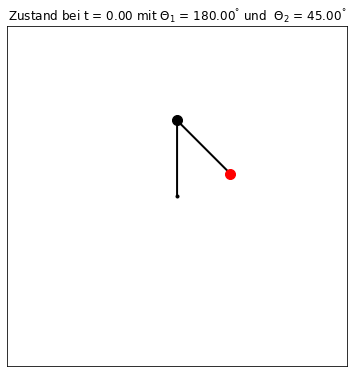

In [5]:
# Hier wird geplottet!
theta1, theta2 = y[:,0], y[:,2]

# Berechne die kartesischen Koordinaten aus den Winkeln und Längen die wir oben definiert haben
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Zeichne uns mal den ersten Punkt
i = 0

r = 0.25
ns = 20
trail_secs = 1
    
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

c0 = ax.plot(0,0,'o',markersize=3,color='black') # Aufhängpunkt

ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k') # Pendelarme

c1 = ax.plot(x1[i],y1[i],'o',markersize=10,color='black') # sich bewegende Massen
c2 = ax.plot(x2[i],y2[i],'o',markersize=10,color='red')

# Zeichne eine Linie hinter der roten Kugel als "Schweif"
s = int(trail_secs / dt) // ns
for j in range(ns):
    imin = i - (ns-j)*s
    if imin < 0: continue
    imax = imin + s + 1
    alpha = (j/ns)**2
    ax.plot(x2[imin:imax], y2[imin:imax], c='r', solid_capstyle='butt',lw=2, alpha=alpha)
    
ax.set_xlim(-L1-L2-r, L1+L2+r)
ax.set_ylim(-L1-L2-r, L1+L2+r)
ax.set_aspect('equal', adjustable='box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.title('Zustand bei t = %.2f mit $\Theta_1$ = %.2f$^°$ und  $\Theta_2$ = %.2f$^°$' %(i * dt, w1, w2))
plt.show()

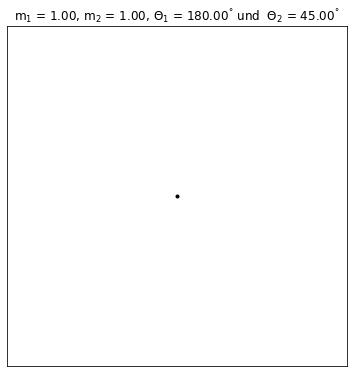

In [11]:
# Und jetzt machen wir ein Video davon!
# Erstmal alles vorbereiten...

def pendolum_init():
    lines.set_data([], [])
    return (lines,)

def pendolum_animate(i):
    lines.set_data([0,x1[i],x2[i]],[0,y1[i],y2[i]])
    c1.set_data([x1[i]],[y1[i]])
    c2.set_data([x2[i]],[y2[i]])
    s = int(trail_secs / dt) // ns
    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0: continue
        imax = imin + s + 1
        trail[j].set_data(x2[imin:imax],y2[imin:imax])
        tstr = ("%.2f" %(i*dt))
        time_text.set_text("time = " + tstr)
    return (lines,)

i = 50

fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

# hanging point
c0 = ax.plot(0,0,'o',markersize=3,color='black')

# pendolum arms
lines, = ax.plot([], [], lw=2, c='k')

# moving masses
c1, = ax.plot([],[],'o',markersize=10,color='black')
c2, = ax.plot([],[],'o',markersize=10,color='red')

# m2 trail
s = int(trail_secs / dt) // ns
trail = []
for j in range(ns):
    imin = i - (ns-j)*s
    if imin < 0: 
        continue
    imax = imin + s + 1
    alpha = (j/ns)**2
    trail_j, = ax.plot([],[], c='r', solid_capstyle='butt',lw=2, alpha=alpha)
    trail.append(trail_j)

ax.set_xlim(-L1-L2-r, L1+L2+r)
ax.set_ylim(-L1-L2-r, L1+L2+r)
ax.set_aspect('equal', adjustable='box')
#plt.axis('off')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
time_text = plt.text(0.9,0.1,"",transform = ax.transAxes, ha="right")
plt.title('m$_1$ = %.2f, m$_2$ = %.2f, $\Theta_1$ = %.2f$^°$ und  $\Theta_2$ = %.2f$^°$' %(m1, m2, w1, w2))
plt.show()

anim = FuncAnimation(fig,pendolum_animate,frames=range(len(x1)),init_func=pendolum_init,blit=True)

In [12]:
# Und hier entsteht dann das Video!
HTML(anim.to_html5_video())

In [17]:
#Falls ihr das Gif speichern wollt:
anim.save('doublependolum.gif', writer=FFMpegWriter(fps=20))

# Viele Pendel zusammen

In [63]:
def get_cmap(n, name='rainbow'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [67]:
# time frame
tmax = 20
dt = 0.04
t = np.arange(0, tmax+dt, dt)

# number of pendola
npend = 101

# Range of initial conditions, only slightly different
frac    = 0.00001
theta10 = 3*np.pi/7
theta20 = 3*np.pi/4

y0i = [ np.array([theta10,0,theta20+i*theta20*frac,0]) for i in range(npend) ]

In [68]:
# Numerical integration of the equations of motion for all different initial conditions 
yi = [ odeint(deriv, _y0, t, args=(L1, L2, m1, m2)) for _y0 in y0i ]

# Cartesian coordinates
x1i = []
x2i = []
y1i = []
y2i = []
for _y in yi:
    _theta1, _theta2 = _y[:,0], _y[:,2]
    _x1 =  L1 * np.sin(_theta1)
    _y1 = -L1 * np.cos(_theta1)
    _x2 = _x1 + L2 * np.sin(_theta2)
    _y2 = _y1 - L2 * np.cos(_theta2)
    x1i.append( _x1 )
    x2i.append( _x2 )
    y1i.append( _y1 )
    y2i.append( _y2 )

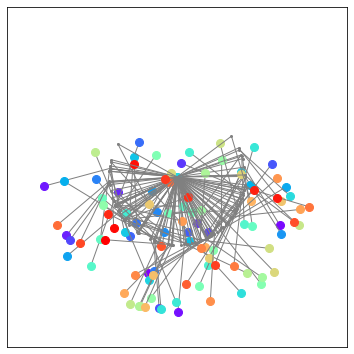

In [69]:
#plot one point in time

i = 500
r = 0.5
cmap = get_cmap(npend)

fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)
c0 = ax.plot(0,0,'o',markersize=3,color='black')

icol = 0
for _x1,_x2,_y1,_y2 in zip(x1i,x2i,y1i,y2i):
    lines, = ax.plot([0, _x1[i], _x2[i]], [0, _y1[i], _y2[i]], lw=1, c='grey')
    c1, = ax.plot(_x1[i],_y1[i],'o',markersize=2,color='grey') 
    c2, = ax.plot(_x2[i],_y2[i],'o',markersize=8,color=cmap(icol))
    icol+=1

ax.set_xlim(-L1-L2-r, L1+L2+r)
ax.set_ylim(-L1-L2-r, L1+L2+r)
ax.set_aspect('equal', adjustable='box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()

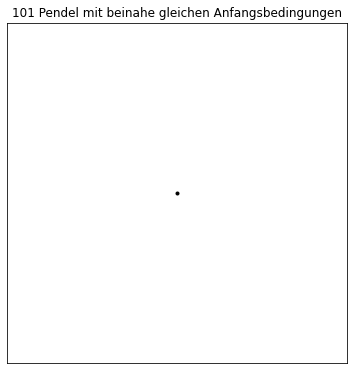

In [74]:
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)
c0 = ax.plot(0,0,'o',markersize=3,color='black')

arm = []
mm1 = []
mm2 = []
trail = []
icol = 0
for _ in range(npend):
    lines, = ax.plot([], [], lw=1, c='grey')
    c1, = ax.plot([],[],'o',markersize=2,color='grey')
    c2, = ax.plot([],[],'o',markersize=8,color=cmap(icol))
    arm.append( lines )
    mm1.append( c1 )
    mm2.append( c2 )
    icol+=1

ax.set_xlim(-L1-L2-r, L1+L2+r)
ax.set_ylim(-L1-L2-r, L1+L2+r)
ax.set_aspect('equal', adjustable='box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
time_text = plt.text(0.9,0.1,"",transform = ax.transAxes, ha="right")
plt.title('101 Pendel mit beinahe gleichen Anfangsbedingungen')
plt.show()

In [75]:
def pendola_init():
    for lines,c1,c2,trail_i in zip(arm,mm1,mm2,trail):
        lines.set_data([],[]); 
        c1.set_data([],[])
        c2.set_data([],[])
        s = int(trail_secs / dt) // ns
    return tuple(arm,)

def pendola_animate(i):
    np = 0
    for lines,c1,c2 in zip(arm,mm1,mm2):
        tstr = ("%.2f" %(i*dt))
        time_text.set_text("time = " + tstr)
        _x1 = x1i[np]
        _x2 = x2i[np]
        _y1 = y1i[np]
        _y2 = y2i[np]
        lines.set_data([0,_x1[i],_x2[i]],[0,_y1[i],_y2[i]])
        c1.set_data([_x1[i]],[_y1[i]])
        c2.set_data([_x2[i]],[_y2[i]])
        np+=1
    return tuple(arm,)

anim100 = FuncAnimation(fig,pendola_animate,frames=range(len(x1i[0])),init_func=pendola_init,blit=True)

HTML(anim100.to_html5_video())

In [76]:
anim100.save('101_Pendel.gif', writer='imagemagick', fps=20)

MovieWriter imagemagick unavailable; using Pillow instead.
